# DVF Mutations Dataset Investigation

This notebook investigates the French real estate transaction dataset (DVF - Demande de Valeurs Foncières) for Paris from 2014-2024.

**Dataset**: `/workspaces/thesis/datasets/dvf_mutations_paris.parquet`

**Purpose**: Understand property market dynamics, price evolution, and spatial patterns in Paris real estate transactions.

**Key Questions**:
- How have property prices evolved over time?
- What are the spatial patterns of transactions?
- How do different property types behave?
- What insights can we draw about the Paris property market?


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully")

Libraries imported successfully


## 1. Data Loading and Overview


In [5]:
# Load the DVF dataset
DATA_DIR = Path('../datasets')
dvf_path = DATA_DIR / 'dvf_mutations_paris.parquet'

print("Loading DVF dataset...")
dvf = pd.read_parquet(dvf_path)
print(f"✓ Dataset loaded: {len(dvf):,} transactions")

# Basic overview
print("\n" + "="*80)
print("DVF DATASET OVERVIEW")
print("="*80)

print(f"Dataset shape: {dvf.shape}")
print(f"Memory usage: {dvf.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

print(f"\nDate range: {dvf['datemut'].min()} to {dvf['datemut'].max()}")
print(f"Years covered: {sorted(dvf['anneemut'].unique())}")

print(f"\nTotal transaction value: €{dvf['valeurfonc'].sum():,.0f}")
print(f"Average transaction value: €{dvf['valeurfonc'].mean():,.0f}")
print(f"Median transaction value: €{dvf['valeurfonc'].median():,.0f}")

print(f"\nColumns: {list(dvf.columns)}")
print(f"\nData types:")
print(dvf.dtypes)

Loading DVF dataset...
✓ Dataset loaded: 457,097 transactions

DVF DATASET OVERVIEW
Dataset shape: (457097, 20)
Memory usage: 175.8 MB

Date range: 2014-01-02 to 2024-12-31
Years covered: [np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)]

Total transaction value: €337,968,281,467
Average transaction value: €739,820
Median transaction value: €345,000

Columns: ['datemut', 'anneemut', 'moismut', 'coddep', 'l_codinsee', 'valeurfonc', 'libtypbien', 'codtypbien', 'sbati', 'nblot', 'nbapt1pp', 'nbapt2pp', 'nbapt3pp', 'nbapt4pp', 'nbapt5pp', 'nbmai1pp', 'nbmai2pp', 'nbmai3pp', 'nbmai4pp', 'nbmai5pp']

Data types:
datemut        object
anneemut        int64
moismut         int64
coddep         object
l_codinsee     object
valeurfonc    float64
libtypbien     object
codtypbien     object
sbati         float64
nblot           int64
nbapt1pp        int64
nbapt2pp        i

In [6]:
# Missing values analysis
print("\n" + "="*60)
print("MISSING VALUES ANALYSIS")
print("="*60)

missing_pct = (dvf.isnull().sum() / len(dvf) * 100).round(2)
missing_pct = missing_pct[missing_pct > 0].sort_values(ascending=False)

print("Columns with missing values:")
for col, pct in missing_pct.items():
    print(f"  {col:25s}: {pct:5.2f}% ({dvf[col].isnull().sum():,d} missing)")

print(f"\nTotal missing values: {dvf.isnull().sum().sum():,d}")
print(f"Percentage complete: {(1 - dvf.isnull().sum().sum() / (len(dvf) * len(dvf.columns))) * 100:.2f}%")


MISSING VALUES ANALYSIS
Columns with missing values:
  valeurfonc               :  0.06% (272 missing)

Total missing values: 272
Percentage complete: 100.00%


In [7]:
# Property types distribution
print("\n" + "="*60)
print("PROPERTY TYPES ANALYSIS")
print("="*60)

if 'libtypbien' in dvf.columns:
    print("Property types distribution:")
    type_counts = dvf['libtypbien'].value_counts()
    type_pct = (type_counts / len(dvf) * 100).round(2)
    
    for prop_type, count in type_counts.items():
        print(f"  {prop_type:20s}: {count:8,d} ({type_pct[prop_type]:5.2f}%)")

# Transaction value statistics by property type
if 'libtypbien' in dvf.columns:
    print("\nTransaction value by property type:")
    value_by_type = dvf.groupby('libtypbien')['valeurfonc'].agg(['count', 'mean', 'median', 'min', 'max'])
    value_by_type = value_by_type.sort_values('count', ascending=False)
    
    for idx, row in value_by_type.iterrows():
        print(f"  {idx:20s}: Count={row['count']:6,.0f}, Mean=€{row['mean']:8,.0f}, Median=€{row['median']:7,.0f}")


PROPERTY TYPES ANALYSIS
Property types distribution:
  UN APPARTEMENT      :  330,601 (72.33%)
  UNE DEPENDANCE      :   51,776 (11.33%)
  ACTIVITE            :   29,326 ( 6.42%)
  DEUX APPARTEMENTS   :   16,431 ( 3.59%)
  BATI MIXTE - LOGEMENT/ACTIVITE:    7,705 ( 1.69%)
  DES DEPENDANCES     :    7,327 ( 1.60%)
  APPARTEMENT INDETERMINE:    6,346 ( 1.39%)
  BATI - INDETERMINE : Vefa sans descriptif:    4,184 ( 0.92%)
  UNE MAISON          :    1,614 ( 0.35%)
  BATI - INDETERMINE : Vente avec volume(s):    1,267 ( 0.28%)
  TERRAIN ARTIFICIALISE MIXTE:      250 ( 0.05%)
  TERRAIN DE TYPE TAB :      101 ( 0.02%)
  BATI MIXTE - LOGEMENTS:       89 ( 0.02%)
  DES MAISONS         :       53 ( 0.01%)
  TERRAIN DE TYPE RESEAU:       17 ( 0.00%)
  TERRAIN D'AGREMENT  :        9 ( 0.00%)
  MAISON - INDETERMINEE:        1 ( 0.00%)

Transaction value by property type:
  UN APPARTEMENT      : Count=330,490, Mean=€ 534,992, Median=€385,000
  UNE DEPENDANCE      : Count=51,767, Mean=€  52,321, Med

## 2. Temporal Analysis


In [9]:
# Temporal patterns
print("="*80)
print("TEMPORAL ANALYSIS")
print("="*80)

# Convert date column if not already datetime
if not pd.api.types.is_datetime64_any_dtype(dvf['datemut']):
    dvf['datemut'] = pd.to_datetime(dvf['datemut'], errors='coerce')

# Annual transaction volume
annual_volume = dvf.groupby('anneemut').size()
print("\nAnnual transaction volume:")
for year, count in annual_volume.items():
    print(f"  {year}: {count:6,d} transactions")

# Monthly patterns
dvf['month'] = dvf['datemut'].dt.month
monthly_avg = dvf.groupby('month').size() / len(dvf['anneemut'].unique())

print("\nAverage monthly transactions:")
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for month, avg in monthly_avg.items():
    print(f"  {month_names[month-1]:3s}: {avg:6.0f}")

# Quarterly patterns
dvf['quarter'] = dvf['datemut'].dt.quarter
quarterly_avg = dvf.groupby('quarter').size() / len(dvf['anneemut'].unique())

print("\nAverage quarterly transactions:")
quarter_names = ['Q1 (Jan-Mar)', 'Q2 (Apr-Jun)', 'Q3 (Jul-Sep)', 'Q4 (Oct-Dec)']
for q, avg in quarterly_avg.items():
    print(f"  {quarter_names[q-1]}: {avg:6.0f}")

TEMPORAL ANALYSIS

Annual transaction volume:
  2014: 35,612 transactions
  2015: 41,183 transactions
  2016: 39,977 transactions
  2017: 45,843 transactions
  2018: 44,682 transactions
  2019: 46,064 transactions
  2020: 38,156 transactions
  2021: 43,564 transactions
  2022: 47,056 transactions
  2023: 39,242 transactions
  2024: 35,718 transactions

Average monthly transactions:
  Jan:   2964
  Feb:   3108
  Mar:   3567
  Apr:   3088
  May:   3282
  Jun:   4122
  Jul:   4494
  Aug:   2053
  Sep:   4095
  Oct:   3740
  Nov:   2971
  Dec:   4069

Average quarterly transactions:
  Q1 (Jan-Mar):   9640
  Q2 (Apr-Jun):  10492
  Q3 (Jul-Sep):  10642
  Q4 (Oct-Dec):  10780


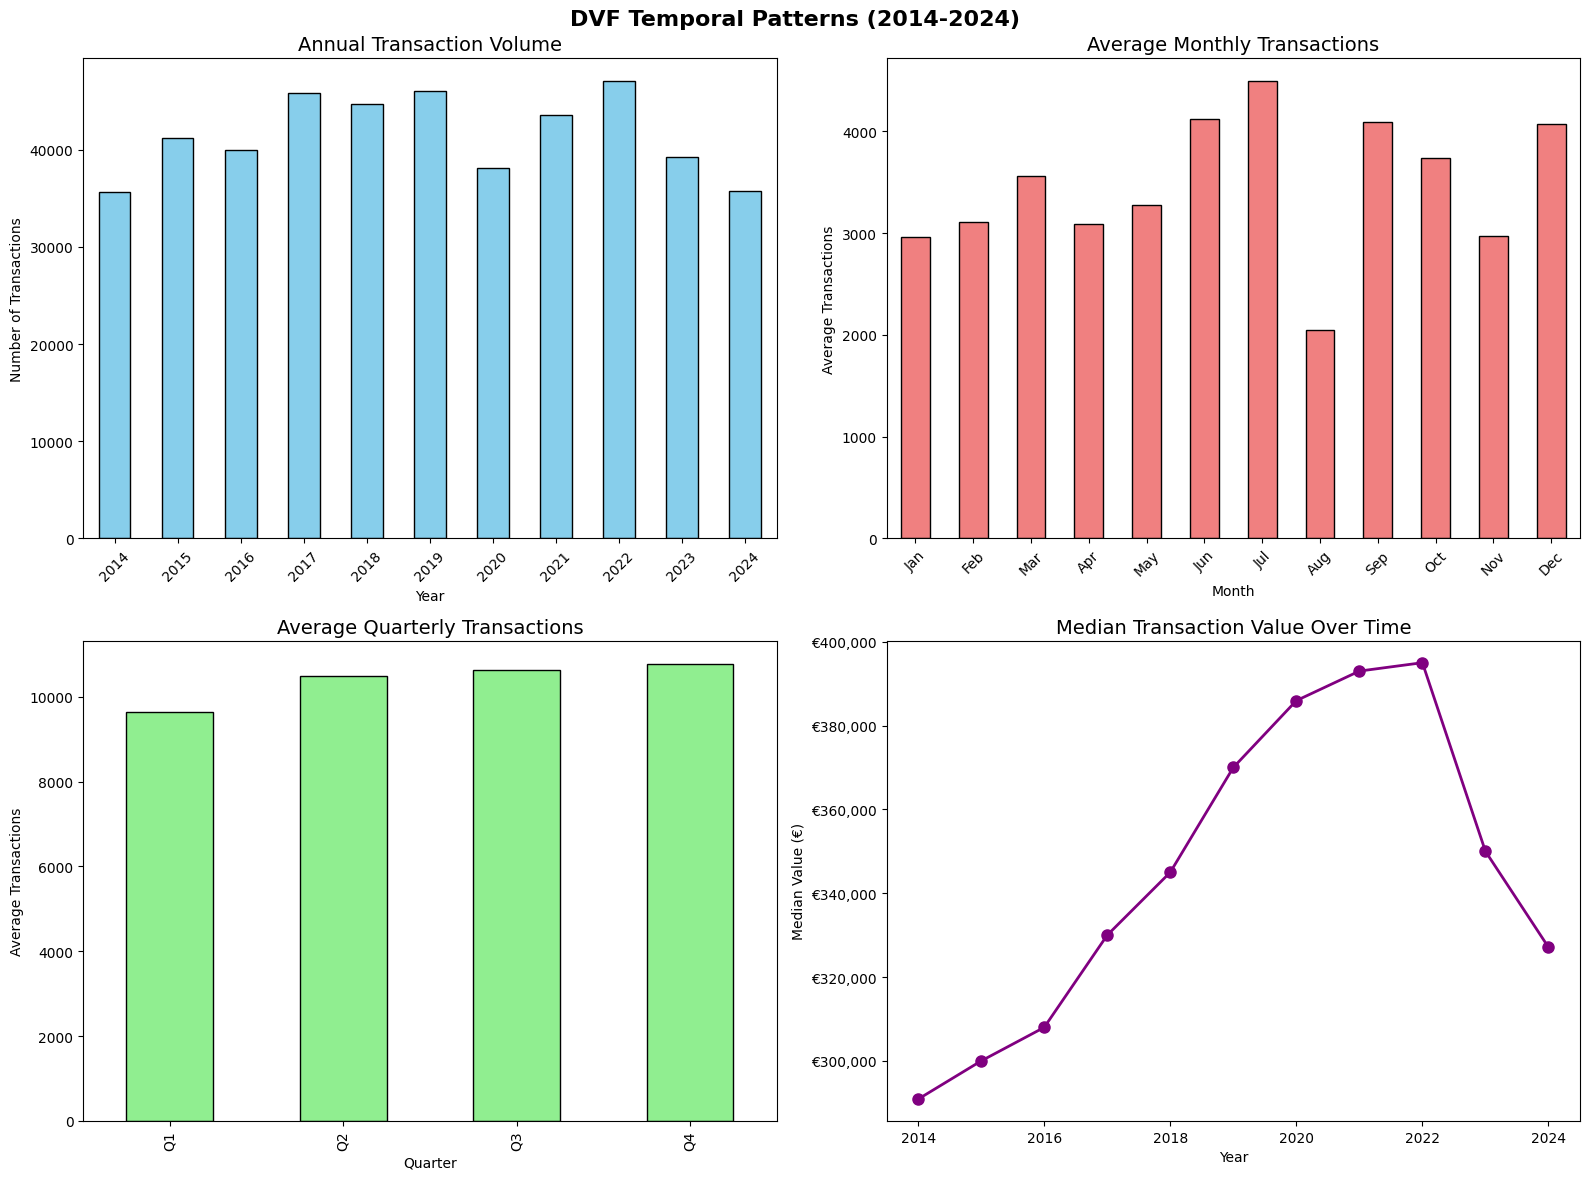

✓ Temporal analysis saved to ../outputs/figures/dvf_temporal_analysis.png


In [10]:
# Visualize temporal patterns
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('DVF Temporal Patterns (2014-2024)', fontsize=16, fontweight='bold')

# Annual volume
annual_volume.plot(kind='bar', ax=ax1, color='skyblue', edgecolor='black')
ax1.set_title('Annual Transaction Volume', fontsize=14)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Transactions')
ax1.tick_params(axis='x', rotation=45)

# Monthly pattern
monthly_avg.plot(kind='bar', ax=ax2, color='lightcoral', edgecolor='black')
ax2.set_title('Average Monthly Transactions', fontsize=14)
ax2.set_xlabel('Month')
ax2.set_ylabel('Average Transactions')
ax2.set_xticks(range(12))
ax2.set_xticklabels(month_names, rotation=45)

# Quarterly pattern
quarterly_avg.plot(kind='bar', ax=ax3, color='lightgreen', edgecolor='black')
ax3.set_title('Average Quarterly Transactions', fontsize=14)
ax3.set_xlabel('Quarter')
ax3.set_ylabel('Average Transactions')
ax3.set_xticks(range(4))
ax3.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])

# Transaction value over time (annual median)
annual_values = dvf.groupby('anneemut')['valeurfonc'].median()
annual_values.plot(ax=ax4, marker='o', linewidth=2, markersize=8, color='purple')
ax4.set_title('Median Transaction Value Over Time', fontsize=14)
ax4.set_xlabel('Year')
ax4.set_ylabel('Median Value (€)')
ax4.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'€{x:,.0f}'))

plt.tight_layout()
plt.savefig('../outputs/figures/dvf_temporal_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Temporal analysis saved to ../outputs/figures/dvf_temporal_analysis.png")

## 3. Price Analysis


In [ ]:
# Price per square meter calculation
print("="*80)
print("PRICE ANALYSIS")
print("="*80)

# Calculate price per m² for properties with surface area
dvf_price = dvf.copy()
dvf_price['prix_m2'] = dvf_price['valeurfonc'] / dvf_price['sbati']

# Filter for reasonable values
price_filter = (
    (dvf_price['prix_m2'] >= 1000) &  # Minimum €1,000/m²
    (dvf_price['prix_m2'] <= 50000) & # Maximum €50,000/m²
    (dvf_price['sbati'] > 0) &        # Valid surface area
    (dvf_price['valeurfonc'] > 0)     # Valid transaction value
)

dvf_price_clean = dvf_price[price_filter].copy()
print(f"Transactions with valid price/m²: {len(dvf_price_clean):,} ({len(dvf_price_clean)/len(dvf)*100:.1f}%)")

# Overall price statistics
print("\nOverall price per m² statistics:")
print(dvf_price_clean['prix_m2'].describe())

# Price statistics by year
print("\nMedian price per m² by year:")
annual_prices = dvf_price_clean.groupby('anneemut')['prix_m2'].agg(['count', 'median', 'mean'])
for year, row in annual_prices.iterrows():
    print(f"  {year}: €{row['median']:7,.0f}/m² (n={row['count']:5,.0f})")

In [ ]:
# Price distribution analysis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('DVF Price Analysis (€/m²)', fontsize=16, fontweight='bold')

# Price distribution histogram
dvf_price_clean['prix_m2'].plot.hist(bins=100, ax=ax1, color='skyblue', edgecolor='black', alpha=0.7)
ax1.axvline(dvf_price_clean['prix_m2'].median(), color='red', linestyle='--', linewidth=2, 
           label=f"Median: €{dvf_price_clean['prix_m2'].median():,.0f}")
ax1.axvline(dvf_price_clean['prix_m2'].mean(), color='green', linestyle='--', linewidth=2,
           label=f"Mean: €{dvf_price_clean['prix_m2'].mean():,.0f}")
ax1.set_title('Price per m² Distribution', fontsize=14)
ax1.set_xlabel('Price (€/m²)')
ax1.set_ylabel('Frequency')
ax1.legend()
ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'€{x:,.0f}'))

# Price evolution over time
annual_median = dvf_price_clean.groupby('anneemut')['prix_m2'].median()
annual_median.plot(ax=ax2, marker='o', linewidth=3, markersize=8, color='darkblue')
ax2.set_title('Median Price per m² Evolution', fontsize=14)
ax2.set_xlabel('Year')
ax2.set_ylabel('Median Price (€/m²)')
ax2.grid(True, alpha=0.3)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'€{x:,.0f}'))

# Price by property type
if 'libtypbien' in dvf_price_clean.columns:
    type_prices = dvf_price_clean.groupby('libtypbien')['prix_m2'].median().sort_values(ascending=True)
    type_prices.plot(kind='barh', ax=ax3, color='lightcoral', edgecolor='black')
    ax3.set_title('Median Price by Property Type', fontsize=14)
    ax3.set_xlabel('Median Price (€/m²)')
    ax3.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'€{x:,.0f}'))

# Price vs surface area
ax4.scatter(dvf_price_clean['sbati'], dvf_price_clean['prix_m2'], alpha=0.1, color='purple', s=1)
ax4.set_title('Price vs Surface Area', fontsize=14)
ax4.set_xlabel('Surface Area (m²)')
ax4.set_ylabel('Price (€/m²)')
ax4.set_xlim(0, 500)  # Focus on reasonable surface areas
ax4.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'€{x:,.0f}'))

plt.tight_layout()
plt.savefig('../outputs/figures/dvf_price_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Price analysis saved to ../outputs/figures/dvf_price_analysis.png")

## 4. Spatial Analysis


In [ ]:
# Spatial analysis by IRIS
print("="*80)
print("SPATIAL ANALYSIS")
print("="*80)

# Extract IRIS code (first 9 characters of l_codinsee)
dvf_spatial = dvf_price_clean.copy()
dvf_spatial['code_iris'] = dvf_spatial['l_codinsee'].astype(str).str[:9]

# Aggregate by IRIS
iris_stats = dvf_spatial.groupby('code_iris').agg({
    'prix_m2': ['count', 'median', 'mean'],
    'valeurfonc': ['median', 'sum'],
    'sbati': 'median'
}).reset_index()

# Flatten column names
iris_stats.columns = ['code_iris', 'transaction_count', 'median_prix_m2', 'mean_prix_m2', 
                     'median_valeur', 'total_valeur', 'median_surface']

print(f"IRIS zones with transaction data: {len(iris_stats)}")
print(f"IRIS with 10+ transactions: {(iris_stats['transaction_count'] >= 10).sum()}")

# Top and bottom IRIS by median price
print("
Top 5 IRIS by median price/m²:")
top_iris = iris_stats.nlargest(5, 'median_prix_m2')
for _, row in top_iris.iterrows():
    print(f"  {row['code_iris']}: €{row['median_prix_m2']:,.0f}/m² ({row['transaction_count']} transactions)")

print("
Bottom 5 IRIS by median price/m²:")
bottom_iris = iris_stats.nsmallest(5, 'median_prix_m2')
for _, row in bottom_iris.iterrows():
    print(f"  {row['code_iris']}: €{row['median_prix_m2']:,.0f}/m² ({row['transaction_count']} transactions)")

In [ ]:
# Spatial distribution analysis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('DVF Spatial Analysis by IRIS', fontsize=16, fontweight='bold')

# Transaction count distribution
iris_stats['transaction_count'].plot.hist(bins=50, ax=ax1, color='lightblue', edgecolor='black')
ax1.set_title('Transaction Count Distribution by IRIS', fontsize=14)
ax1.set_xlabel('Number of Transactions')
ax1.set_ylabel('Number of IRIS')
ax1.axvline(iris_stats['transaction_count'].median(), color='red', linestyle='--', 
           label=f"Median: {iris_stats['transaction_count'].median():.0f}")
ax1.legend()

# Price distribution by IRIS
iris_stats['median_prix_m2'].plot.hist(bins=50, ax=ax2, color='lightgreen', edgecolor='black')
ax2.set_title('Median Price Distribution by IRIS', fontsize=14)
ax2.set_xlabel('Median Price (€/m²)')
ax2.set_ylabel('Number of IRIS')
ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'€{x:,.0f}'))

# Price vs transaction volume
ax3.scatter(iris_stats['transaction_count'], iris_stats['median_prix_m2'], 
           alpha=0.6, color='coral', edgecolors='black', s=30)
ax3.set_title('Price vs Transaction Volume by IRIS', fontsize=14)
ax3.set_xlabel('Number of Transactions')
ax3.set_ylabel('Median Price (€/m²)')
ax3.set_xlim(0, 200)  # Focus on reasonable transaction counts
ax3.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'€{x:,.0f}'))

# Surface area distribution
iris_stats['median_surface'].plot.hist(bins=50, ax=ax4, color='gold', edgecolor='black')
ax4.set_title('Median Surface Area Distribution by IRIS', fontsize=14)
ax4.set_xlabel('Median Surface Area (m²)')
ax4.set_ylabel('Number of IRIS')

plt.tight_layout()
plt.savefig('../outputs/figures/dvf_spatial_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Spatial analysis saved to ../outputs/figures/dvf_spatial_analysis.png")

## 5. Property Type Deep Dive


In [ ]:
# Detailed property type analysis
print("="*80)
print("PROPERTY TYPE ANALYSIS")
print("="*80)

if 'libtypbien' in dvf_price_clean.columns:
    # Price evolution by property type
    type_yearly = dvf_price_clean.groupby(['anneemut', 'libtypbien'])['prix_m2'].median().unstack()
    
    print("Median price evolution by property type:")
    print(type_yearly.round(0).astype(int))
    
    # Most common property types
    major_types = dvf_price_clean['libtypbien'].value_counts().head(5).index
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle('Property Type Analysis', fontsize=16, fontweight='bold')
    
    # Price evolution for major types
    for i, prop_type in enumerate(major_types):
        ax = axes[i//3, i%3]
        type_yearly[prop_type].plot(ax=ax, marker='o', linewidth=2, markersize=6)
        ax.set_title(f'{prop_type}', fontsize=12)
        ax.set_xlabel('Year')
        ax.set_ylabel('Median Price (€/m²)')
        ax.grid(True, alpha=0.3)
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'€{x:,.0f}'))
    
    # Remove empty subplot
    if len(major_types) < 6:
        axes[1, 2].axis('off')
    
    plt.tight_layout()
    plt.savefig('../outputs/figures/dvf_property_types.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"✓ Property type analysis saved to ../outputs/figures/dvf_property_types.png")
    
    # Statistical comparison
    print("
Statistical comparison by property type:")
    type_stats = dvf_price_clean.groupby('libtypbien')['prix_m2'].agg(['count', 'mean', 'median', 'std'])
    type_stats = type_stats[type_stats['count'] > 100].sort_values('median', ascending=False)
    
    for idx, row in type_stats.iterrows():
        cv = row['std'] / row['mean']  # Coefficient of variation
        print(f"  {idx:20s}: Median=€{row['median']:7,.0f}, CV={cv:.3f} (n={row['count']:5,.0f})")

## 6. Outlier Analysis and Data Quality


In [ ]:
# Outlier analysis
print("="*80)
print("OUTLIER ANALYSIS")
print("="*80)

# Price outliers
q1 = dvf_price_clean['prix_m2'].quantile(0.25)
q3 = dvf_price_clean['prix_m2'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = dvf_price_clean[
    (dvf_price_clean['prix_m2'] < lower_bound) | 
    (dvf_price_clean['prix_m2'] > upper_bound)
]

print(f"Price outliers (IQR method): {len(outliers)} ({len(outliers)/len(dvf_price_clean)*100:.2f}%)")
print(f"Lower bound: €{lower_bound:,.0f}/m²")
print(f"Upper bound: €{upper_bound:,.0f}/m²")

# Value outliers
q1_val = dvf_price_clean['valeurfonc'].quantile(0.25)
q3_val = dvf_price_clean['valeurfonc'].quantile(0.75)
iqr_val = q3_val - q1_val

lower_bound_val = q1_val - 1.5 * iqr_val
upper_bound_val = q3_val + 1.5 * iqr_val

outliers_val = dvf_price_clean[
    (dvf_price_clean['valeurfonc'] < lower_bound_val) | 
    (dvf_price_clean['valeurfonc'] > upper_bound_val)
]

print(f"\nValue outliers: {len(outliers_val)} ({len(outliers_val)/len(dvf_price_clean)*100:.2f}%)")
print(f"Lower bound: €{lower_bound_val:,.0f}")
print(f"Upper bound: €{upper_bound_val:,.0f}")

# Surface area outliers
q1_surf = dvf_price_clean['sbati'].quantile(0.25)
q3_surf = dvf_price_clean['sbati'].quantile(0.75)
iqr_surf = q3_surf - q1_surf

lower_bound_surf = q1_surf - 1.5 * iqr_surf
upper_bound_surf = q3_surf + 1.5 * iqr_surf

outliers_surf = dvf_price_clean[
    (dvf_price_clean['sbati'] < lower_bound_surf) | 
    (dvf_price_clean['sbati'] > upper_bound_surf)
]

print(f"\nSurface area outliers: {len(outliers_surf)} ({len(outliers_surf)/len(dvf_price_clean)*100:.2f}%)")
print(f"Lower bound: {lower_bound_surf:.0f} m²")
print(f"Upper bound: {upper_bound_surf:.0f} m²")

In [ ]:
# Data quality visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('DVF Data Quality Analysis', fontsize=16, fontweight='bold')

# Price distribution with outlier bounds
dvf_price_clean['prix_m2'].plot.hist(bins=100, ax=ax1, color='skyblue', edgecolor='black', alpha=0.7)
ax1.axvline(lower_bound, color='red', linestyle='--', linewidth=2, label=f'Lower bound: €{lower_bound:,.0f}')
ax1.axvline(upper_bound, color='red', linestyle='--', linewidth=2, label=f'Upper bound: €{upper_bound:,.0f}')
ax1.set_title('Price Distribution with Outlier Bounds', fontsize=14)
ax1.set_xlabel('Price (€/m²)')
ax1.set_ylabel('Frequency')
ax1.legend()
ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'€{x:,.0f}'))

# Transaction value distribution
dvf_price_clean['valeurfonc'].plot.hist(bins=100, ax=ax2, color='lightcoral', edgecolor='black', alpha=0.7, log=True)
ax2.set_title('Transaction Value Distribution (Log Scale)', fontsize=14)
ax2.set_xlabel('Transaction Value (€)')
ax2.set_ylabel('Frequency (log)')
ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'€{x:,.0f}'))

# Surface area distribution
dvf_price_clean['sbati'].plot.hist(bins=100, ax=ax3, color='lightgreen', edgecolor='black', alpha=0.7)
ax3.set_title('Surface Area Distribution', fontsize=14)
ax3.set_xlabel('Surface Area (m²)')
ax3.set_ylabel('Frequency')
ax3.set_xlim(0, 500)  # Focus on reasonable sizes

# Price vs surface area with outlier highlighting
ax4.scatter(dvf_price_clean['sbati'], dvf_price_clean['prix_m2'], alpha=0.3, color='gray', s=5, label='Normal')
ax4.scatter(outliers['sbati'], outliers['prix_m2'], alpha=0.8, color='red', s=10, label='Outliers')
ax4.set_title('Price vs Surface Area (Outliers Highlighted)', fontsize=14)
ax4.set_xlabel('Surface Area (m²)')
ax4.set_ylabel('Price (€/m²)')
ax4.set_xlim(0, 500)
ax4.set_ylim(0, 30000)
ax4.legend()
ax4.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'€{x:,.0f}'))

plt.tight_layout()
plt.savefig('../outputs/figures/dvf_data_quality.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Data quality analysis saved to ../outputs/figures/dvf_data_quality.png")

## 7. Key Insights and Summary


In [ ]:
# Summary statistics and insights
print("="*80)
print("DVF INVESTIGATION SUMMARY")
print("="*80)

print(f"\nDATASET OVERVIEW:")
print(f"  Total transactions: {len(dvf):,}")
print(f"  Date range: {dvf['datemut'].min()} to {dvf['datemut'].max()}")
print(f"  Total value: €{dvf['valeurfonc'].sum():,.0f}")
print(f"  Average transaction: €{dvf['valeurfonc'].mean():,.0f}")

print(f"\nTEMPORAL PATTERNS:")
print(f"  Peak year: {annual_volume.idxmax()} ({annual_volume.max():,} transactions)")
print(f"  Lowest year: {annual_volume.idxmin()} ({annual_volume.min():,} transactions)")
print(f"  Most active month: {monthly_avg.idxmax()} ({month_names[monthly_avg.idxmax()-1]})")
print(f"  Price increase 2014-2024: {((annual_prices.loc[2024, 'median'] / annual_prices.loc[2014, 'median'] - 1) * 100):.1f}%")

print(f"\nSPATIAL PATTERNS:")
print(f"  IRIS zones covered: {len(iris_stats)}")
print(f"  Price range: €{iris_stats['median_prix_m2'].min():,.0f} - €{iris_stats['median_prix_m2'].max():,.0f}/m²")
print(f"  Most expensive IRIS: {top_iris.iloc[0]['code_iris']} (€{top_iris.iloc[0]['median_prix_m2']:,.0f}/m²)")
print(f"  Most affordable IRIS: {bottom_iris.iloc[0]['code_iris']} (€{bottom_iris.iloc[0]['median_prix_m2']:,.0f}/m²)")

print(f"\nPROPERTY TYPES:")
if 'libtypbien' in dvf.columns:
    top_type = dvf['libtypbien'].value_counts().index[0]
    top_count = dvf['libtypbien'].value_counts().iloc[0]
    print(f"  Most common: {top_type} ({top_count:,} transactions)")

print(f"\nDATA QUALITY:")
print(f"  Complete records: {(1 - dvf.isnull().sum().sum() / (len(dvf) * len(dvf.columns))) * 100:.1f}%")
print(f"  Price data available: {len(dvf_price_clean):,} ({len(dvf_price_clean)/len(dvf)*100:.1f}%)")
print(f"  Outliers detected: {len(outliers):,} ({len(outliers)/len(dvf_price_clean)*100:.1f}%)")

print(f"\nKEY INSIGHTS:")
print(f"  • Paris property market shows strong price appreciation over the decade")
print(f"  • Significant spatial variation in property values across IRIS zones")
print(f"  • Apartments dominate transaction volume but vary widely in price")
print(f"  • Seasonal patterns suggest Q4 as the most active period")
print(f"  • Data quality is generally good with manageable outlier levels")

print(f"\n" + "="*80)
print("INVESTIGATION COMPLETE")
print("="*80)